In [7]:
import numpy as np
import math
import matplotlib as mpl
#mpl.style.use('Solarize_Light2')
# Importing standard Qiskit libraries
from qiskit import *
from qiskit.visualization import *
from qiskit.circuit.library import *
from qiskit.providers.aer import QasmSimulator
import qiskit.quantum_info as qi
from qiskit.providers.ibmq import *
from qiskit.tools.monitor import job_monitor
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
sim = Aer.get_backend('qasm_simulator')

ibmqfactory.load_account:WARNING:2021-11-18 21:16:41,479: Credentials are already in use. The existing account in the session will be replaced.


In [16]:
# log2(no. of symbols)
n = 2
# No. of rows or columns
N = n**2
# No. of qbits for matrix representation
m = N**2
#No. of qbits per cell
b = 2

In [4]:
def diffuser(n):
    return  MCMTVChain('z', num_ctrl_qubits=n, num_target_qubits=1)

In [5]:
cnst = dict()
for i in range(N):
    for j in range(N):
        cnst[i+N*j]=set()
for i in range(N):
    for j in range(N):
        for k in range(N):
            if k!=i:
                cnst[i+N*j].add(k+N*j)
            if k!=j:
                cnst[i+N*j].add(i+N*k)
            a = n*(i//n)
            b = n*(j//n)
            for p in range(a,a+n):
                for q in range(b,b+n):
                    if p!=i and q!=j:
                        cnst[i+N*j].add(p+N*q)
print(cnst)

{0: {1, 2, 3, 4, 5, 8, 12}, 4: {0, 1, 5, 6, 7, 8, 12}, 8: {0, 4, 9, 10, 11, 12, 13}, 12: {0, 4, 8, 9, 13, 14, 15}, 1: {0, 2, 3, 4, 5, 9, 13}, 5: {0, 1, 4, 6, 7, 9, 13}, 9: {1, 5, 8, 10, 11, 12, 13}, 13: {1, 5, 8, 9, 12, 14, 15}, 2: {0, 1, 3, 6, 7, 10, 14}, 6: {2, 3, 4, 5, 7, 10, 14}, 10: {2, 6, 8, 9, 11, 14, 15}, 14: {2, 6, 10, 11, 12, 13, 15}, 3: {0, 1, 2, 6, 7, 11, 15}, 7: {2, 3, 4, 5, 6, 11, 15}, 11: {3, 7, 8, 9, 10, 14, 15}, 15: {3, 7, 10, 11, 12, 13, 14}}


In [14]:
ct = set()
for i in cnst:
    for j in cnst[i]:
        ct.add((max(i,j),min(i,j)))
print(ct)

{(12, 4), (4, 0), (3, 1), (5, 4), (5, 1), (8, 0), (14, 10), (9, 5), (14, 13), (10, 6), (9, 8), (1, 0), (10, 9), (11, 8), (13, 5), (13, 8), (7, 4), (6, 2), (15, 11), (6, 5), (15, 14), (12, 0), (3, 0), (12, 9), (14, 6), (5, 0), (14, 12), (9, 1), (10, 2), (11, 7), (2, 1), (10, 8), (13, 1), (11, 10), (15, 7), (6, 4), (15, 13), (7, 3), (15, 10), (6, 3), (7, 6), (3, 2), (14, 2), (4, 1), (12, 8), (14, 11), (8, 4), (11, 3), (2, 0), (11, 9), (13, 9), (13, 12), (7, 2), (15, 3), (7, 5), (15, 12)}


In [57]:
var=QuantumRegister(b*m,"var")
wrk=QuantumRegister(b*2*len(ct),"wrk")
aux=QuantumRegister(len(ct),"aux")
out=QuantumRegister(1,"out")
msr=ClassicalRegister(b*m,"msr")
qc=QuantumCircuit(var,wrk,aux,out,msr)

In [58]:
i=0
w=0
or_ins = OR(b).to_instruction()
for x in ct:
    for j in range(b):
        qc.cx(var[b*x[0]+j],wrk[i+j])
        qc.cx(var[b*x[1]+j],wrk[i+b+j])
    tmp=[wrk[z] for z in range(i,i+b)]
    tmp.append(aux[w])
    qc.append(or_ins,qargs=tmp)
    i+=2*b
    w+=1

In [59]:
qc.mct(aux,out)

In [ ]:
qc.append(MCMTVChain('z', num_ctrl_qubits=b*m, num_target_qubits=1),)

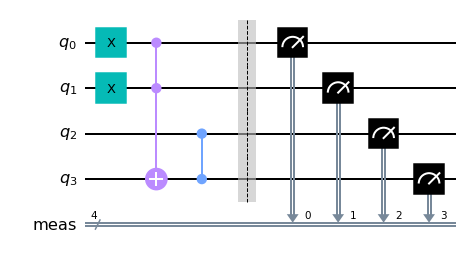

In [93]:
q=QuantumCircuit(4)
#q.z((0,1))
#q.cz(0,1)
q.x((0,1))
q.mct([0,1],[3])
q.cz(2,3)
q.measure_all()
e=execute(q,Aer.get_backend("statevector_simulator"),shots=1024)
q.draw('mpl')

In [94]:
rs=e.result()
rs.get_statevector()

array([ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
        0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j, -0.+0.j, -0.+0.j,
       -0.+0.j, -0.+0.j])

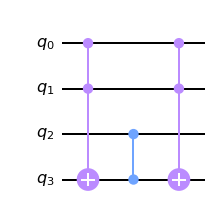

In [83]:
MCMTVChain('z', 2,1).draw('mpl')